# チャットボット


このノートでは、ウェブサイトからFAQを入力してチャットボットを作成します。Natural Language Toolkitのpythonパッケージは、ロボットに教えるために使用されます。



## 目的

日本語で人間と対話できるチャットボットを作成する。

### 目次

<b>1.1.データ分析</b>
* 1.1.インポート
* 1.2.Wordcloud

<b>2.Natural Language Toolkit</b>
* 2.1.トレーニング
* 2.2.結論

## 1.データ分析
### 1.1.インポート

In [9]:
#conda install -c conda-forge wordcloud=1.8.1
#conda install -c conda-forge jieba
#pip install chatterbot
#pip install fugashi[unidic-lite]
import fugashi
import nltk
import random
import string 
import jieba 
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud 

In [10]:
#テキストのファイルをインポートします
with open('C:/Users/PC/Downloads/TXT/amazonjp.txt', 'r', encoding='utf-8') as f1:
    list1 = f1.read()
    list2 = jieba.lcut(list1)

In [11]:
list1.split("\n")[0]

'表示価格について'

### 1.2.Wordcloud

wordcloudパッケージは、データセットで最も使われている単語を表示します。

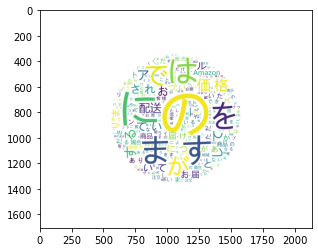

In [12]:
mask=imageio.imread("C:/Users/PC/FLAG1.png")
words=" ".join(list2)
wc=WordCloud(
    width=1000,
    height=800,
    background_color='white',
    font_path="C:/Users/PC/MSYH.TTC", #アジアンフロントは、漢字をインポートする必要がある
    mask=mask
).generate(words).to_file("Japan Cloud.png")

plt.imshow(mpimg.imread('Japan Cloud.png'))

かなを抜いて、よく使われる漢字を表示してみましょう。

In [13]:
kana = ['ァ','ア','ィ','イ','ゥ','ウ','ェ','エ','ォ','オ','カ','ガ','キ','ギ','ク','グ',
        'ケ','ゲ','コ','ゴ','サ','ザ','シ','ジ','ス','ズ,''セ','ゼ','ソ','ゾ','タ',
        'ダ','チ','ヂ','ッ','ツ','ヅ','テ','デ','ト','ド','ナ','ニ','ヌ','ネ','ノ','ハ',
        'バ','パ','ヒ','ビ','ピ','フ','ブ','プ','ヘ','ベ','ペ','ホ','ボ','ポ','マ','ミ',
        'ム','メ','モ','ャ','ヤ','ュ','ユ','ョ','ヨ','ラ','リ','ル','レ','ロ','ヮ','ワ',
        'ヰ','ヱ','ヲ','ン','ヴ','ヵ','ヶ','ヽ','ヾ','ぁ','あ','ぃ','い','ぅ','う','ぇ',
        'え','ぉ','お','か','が','き','ぎ','く','ぐ','け','げ','こ','ご','さ','ざ','し',
        'じ','す','ず','せ','ぜ','そ','ぞ','た','だ','ち','ぢ','っ','つ','づ','て',
        'で','と','ど','な','に','ぬ','ね','の','は','ば','ぱ','ひ','び','ぴ','ふ',
        'ぶ','ぷ','へ','べ','ぺ','ほ','ぼ','ぽ','ま','み','む','め','も','ゃ','や',
        'ゅ','ゆ','ょ','よ','ら','り','る','れ','ろ','ゎ','わ','ゐ','ゑ','を','ん','ゔ',
        'ゕ','ゖ','ゝ','ゞ']

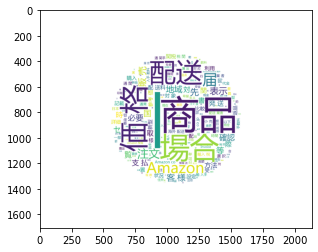

In [14]:
mask=imageio.imread("C:/Users/PC/FLAG1.png")
words=" ".join(list2)
wc=WordCloud(
    width=1000,
    height=800,
    background_color='white',
    font_path="C:/Users/PC/MSYH.TTC",
    stopwords = kana,
    mask=mask
).generate(words).to_file("Japan CloudV2.png")

plt.imshow(mpimg.imread('Japan CloudV2.png'))

## 2.Natural Language Toolkit
### 2.1.トレーニング

fugashiというツールは、取り込んだテキストファイルのユニークな単語のリストを作成します。
つまり、fugashiは日本語のテキストをトークン化するのです。

In [15]:
raw=list1
#文のリストに変換します。 
sent_tokens = nltk.sent_tokenize(raw)

tagger = fugashi.Tagger()

GREETING_INPUTS = ("こにちは")
GREETING_RESPONSES = ("元気ですか", "元気")

#挨拶文をチェックします。
def greeting(sentence):
    """ユーザの入力が挨拶の場合、挨拶応答を返します"""
    for word in sentence.split():
        if word in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

#句読点を外します
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return nltk.user_response(remove_punct_dict)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

TFidf vectorizer を使って、生のドキュメントのコレクションを TF-IDF 特徴の行列に変換します。

また、scikit learn ライブラリの cosine similarity モジュールを使用する必要がある。これは ユーザが入力した単語と、コーパス内の単語の間の類似性を求めるために使用されます。

ユーザーの発話で1つ以上の既知のキーワードを検索し、いくつかの可能な応答の1つを返す関数応答を定義します。もしいずれのキーワードにも一致する入力がない場合、応答を返します:　"すみません、分かりませんでした。"

In [16]:
#返事を作成します
def response(user_response):
    bot_response=''
    #句読点を外します
    TfidfVec = TfidfVectorizer()
    tfidf = TfidfVec.fit_transform(sent_tokens)
    
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        bot_response=bot_response+"すみません、分かりませんでした。"
        return bot_response
    else:
        bot_response = bot_response+sent_tokens[idx]
        return bot_response

flag=True
print("BOT: お問い合わせにお答えします。終了したい場合は、Byeと入力してください")

while(flag==True):
    user_response = input()
    if(user_response!='bye'):
        if(user_response=='ありがとう' or user_response=='どうもありがとうございます' ):
            flag=False
            print("BOT:どういたしまして..")
        else:
            if(greeting(user_response)!=None):
                print("BOT: "+greeting(user_response))
            else:
                sent_tokens.append(user_response)
                print("BOT: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("BOT:さようなら、気を付けて！")           

BOT: お問い合わせにお答えします。終了したい場合は、Byeと入力してください
返品はできますか？
BOT: 返品はできますか？

はい。Amazonでは引き続き返品を受け付けています。返品をご希望の場合は返品受付センターでお手続きください。
5.
商品の受け取りは安全ですか？
BOT: 商品の受け取りは安全ですか？

新型コロナウイルスに関するガイダンスは、世界保健機関（WHO）のウェブサイト（英語）や厚生労働省のウェブサイト（日本語）をご覧ください。なお、Amazonでは、お届けの際は手渡しを控えるだけでなく、手洗いや手の消毒、配送用車両や携帯電話といった配送ツールの消毒も欠かさず行っています。
6.
現在もAmazonでお買い物できますか？
BOT: 現在もAmazonでお買い物できますか？ 現在もAmazonは配送を行っていますか？

はい、現在もAmazonではご注文を承っており、配送を行っています。ただし、お届けまでに通常より時間がかかる場合があります。なお、お届け先の住所には、閉鎖や休業の可能性がある施設（学校など）の住所を使用しないようご注意ください。

Amazonの取り組みについて詳しくは、以下をご覧ください。

新型コロナウイルスの影響を受けたお客様、地域社会、社員の皆様への支援について
2.
ありがとう
BOT:どういたしまして..


### Conclusion

NLTKを使って、テキストファイルを読み込んで、お客様の質問に答えるChatBotを作ることができました。より正確な回答を得るためには、テキストファイルに正確な質問と回答を作成する必要があります。